# Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Data


* The data was retrieved from the [BioLINCC](https://biolincc.nhlbi.nih.gov/teaching/) website
* Data was obtained from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts which was collected during three examination periods, approximately 6 years apart, from roughly 1956 to 1968
* Missing values in the dataset are indicated by a period (.)
* Disclaimer: This is teaching data that has been rendered anonymous through the application of certain statistical processes such as permutations and/or random visit selection. We cannot claim or imply that any inferences derived from the teaching datasets are valid estimates

## Data Dictionary

|Variable|Description|Variable Type|Levels (if applicable)/<br> Notes|
| --- | --- |---|---|
|RANDID | Unique identification number for each participant|NA||
|SEX | Participant sex|Categorical|1=Men <br> 2=Women|
|PERIOD|Examination Cycle|Categorical|1=Period 1 <br> 2=Period 2 <br> 3=Period 3|
|AGE|Age at exam (years)|Continuous|
|SYSBP|Systolic Blood Pressure (mean of last two of three <br> measurements) (mmHg)|Continuous|
|DIABP|Diastolic Blood Pressure (mean of last two of three <br> measurements) (mmHg)|Continuous|
|BPMEDS|Use of Anti-hypertensive medication at exam|Categorical|0=Not currently used <br> 1=Current Use|
|CURSMOKE|Current cigarette smoking at exam|Categorical|0=Not current smoker <br> 1=Current smoker|
|CIGPDAY|Number of cigarettes smoked each day|Continuous|0=Not current smoker <br> 1-90 cigarettes per day|
|TOTCHOL|Serum Total Cholesterol (mg/dL)|Continuous|
|HDLC|High Density Lipoprotein Cholesterol (mg/dL)|Continuous|Available for period 3 only|
|LDLC|Low Density Lipoprotein Cholesterol (mg/dL)|Continuous|Available for period 3 only|
|BMI|Body Mass Index, weight in kilograms/height <br> meters squared|Continuous|
|GLUCOSE|Casual serum glucose (mg/dL)|Continuous|
|DIABETES|Diabetic according to criteria of first exam <br> treated or first exam with casual glucose <br> of 200 mg/dL or more|Categorical|0=Not a diabetic <br> 1=Diabetic|
|HEARTRTE|Heart rate (Ventricular rate) in beats/min|Continuous|
|PREVHYP|Prevalent Hypertensive. Subject was defined as <br> hypertensive if treated or if second exam at <br>which mean systolic was >=140 mmHg or mean<br>  Diastolic >=90 mmHg|Categorical|0=Free of disease <br> 1=Prevalent disease|
|ANYCHD|Angina Pectoris, <br> Myocardial infarction (Hospitalized and silent or unrecognized), <br>Coronary Insufficiency (Unstable Angina), <br> or Fatal Coronary Heart Disease|Categorical|0=Event did not occur during follow up <br> 1=Event occurred during followup|
|STROKE|Atherothrombotic infarction, <br>Cerebral Embolism, <br>Intracerebral Hemorrhage, <br> or Subarachnoid Hemorrhage, <br> or Fatal Cerebrovascular Disease|Categorical|0=Event did not occur during follow up <br> 1=Event occurred during followup|
|DEATH|Death from any cause|Categorical|0=Event did not occur during follow up <br> 1=Event occurred during followup|

In [2]:
framingham = pd.read_csv('/Users/silviacatalina/Google Drive/BethelTech/GitHub/wozU-DataSci/DS0110-FinalProject/Framingham/Data/csv/frmgham2.csv', na_values=".")
pd.options.display.max_columns = None
framingham.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,educ,PREVCHD,PREVAP,PREVMI,PREVSTRK,PREVHYP,TIME,PERIOD,HDLC,LDLC,DEATH,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,4.0,0,0,0,0,0,0,1,NaN,NaN,0,0,1,1,1,0,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.0,52,121.0,66.0,0,0.0,NaN,0,0.0,69.0,92.0,4.0,0,0,0,0,0,4628,3,31.0,178.0,0,0,1,1,1,0,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,95.0,76.0,2.0,0,0,0,0,0,0,1,NaN,NaN,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,6238,2,260.0,52,105.0,69.5,0,0.0,29.43,0,0.0,80.0,86.0,2.0,0,0,0,0,0,2156,2,NaN,NaN,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,0.0,80.0,71.0,2.0,0,0,0,0,0,4344,3,54.0,141.0,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766


In [3]:
framingham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEX       11627 non-null  int64  
 2   TOTCHOL   11218 non-null  float64
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   CURSMOKE  11627 non-null  int64  
 7   CIGPDAY   11548 non-null  float64
 8   BMI       11575 non-null  float64
 9   DIABETES  11627 non-null  int64  
 10  BPMEDS    11034 non-null  float64
 11  HEARTRTE  11621 non-null  float64
 12  GLUCOSE   10187 non-null  float64
 13  educ      11332 non-null  float64
 14  PREVCHD   11627 non-null  int64  
 15  PREVAP    11627 non-null  int64  
 16  PREVMI    11627 non-null  int64  
 17  PREVSTRK  11627 non-null  int64  
 18  PREVHYP   11627 non-null  int64  
 19  TIME      11627 non-null  int64  
 20  PERIOD    11627 non-null  in

# Data Wrangling

## Selecting Columns of Interest

### List of original columns
RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,educ,PREVCHD,PREVAP,
PREVMI,PREVSTRK,PREVHYP,TIME,PERIOD,HDLC,LDLC,DEATH,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,HYPERTEN,TIMEAP,
TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP

In [4]:
framingham1 = framingham[['RANDID', 'SEX', 'PERIOD', 'AGE', 'SYSBP', 'DIABP', 'BPMEDS', 'CURSMOKE', 
                          'CIGPDAY', 'TOTCHOL', 'HDLC', 'LDLC', 'BMI', 'GLUCOSE', 'DIABETES', 'HEARTRTE', 
                          'PREVHYP', 'ANYCHD', 'STROKE', 'DEATH']]
framingham1.head()

,RANDID,SEX,PERIOD,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,LDLC,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
0,2448,1,1,39,106.0,70.0,0.0,0,0.0,195.0,NaN,NaN,26.97,77.0,0,80.0,0,1,0,0
1,2448,1,3,52,121.0,66.0,0.0,0,0.0,209.0,31.0,178.0,NaN,92.0,0,69.0,0,1,0,0
2,6238,2,1,46,121.0,81.0,0.0,0,0.0,250.0,NaN,NaN,28.73,76.0,0,95.0,0,0,0,0
3,6238,2,2,52,105.0,69.5,0.0,0,0.0,260.0,NaN,NaN,29.43,86.0,0,80.0,0,0,0,0
4,6238,2,3,58,108.0,66.0,0.0,0,0.0,237.0,54.0,141.0,28.50,71.0,0,80.0,0,0,0,0


In [5]:
framingham1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEX       11627 non-null  int64  
 2   PERIOD    11627 non-null  int64  
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   BPMEDS    11034 non-null  float64
 7   CURSMOKE  11627 non-null  int64  
 8   CIGPDAY   11548 non-null  float64
 9   TOTCHOL   11218 non-null  float64
 10  HDLC      3027 non-null   float64
 11  LDLC      3026 non-null   float64
 12  BMI       11575 non-null  float64
 13  GLUCOSE   10187 non-null  float64
 14  DIABETES  11627 non-null  int64  
 15  HEARTRTE  11621 non-null  float64
 16  PREVHYP   11627 non-null  int64  
 17  ANYCHD    11627 non-null  int64  
 18  STROKE    11627 non-null  int64  
 19  DEATH     11627 non-null  int64  
dtypes: float64(10), int64(10)
me

### Subset data to periods 1, 2, 3; Remove NAs; Reset indexes
* Variables removed: PERIOD and HDLC, LDLC for periods 1 and 2

In [6]:
framinghamP1 = framingham1[framingham1['PERIOD'] == 1].copy()
framinghamP1.head()

,RANDID,SEX,PERIOD,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,LDLC,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
0,2448,1,1,39,106.0,70.0,0.0,0,0.0,195.0,NaN,NaN,26.97,77.0,0,80.0,0,1,0,0
2,6238,2,1,46,121.0,81.0,0.0,0,0.0,250.0,NaN,NaN,28.73,76.0,0,95.0,0,0,0,0
5,9428,1,1,48,127.5,80.0,0.0,1,20.0,245.0,NaN,NaN,25.34,70.0,0,75.0,0,0,0,0
7,10552,2,1,61,150.0,95.0,0.0,1,30.0,225.0,NaN,NaN,28.58,103.0,0,65.0,1,0,1,1
9,11252,2,1,46,130.0,84.0,0.0,1,23.0,285.0,NaN,NaN,23.10,85.0,0,85.0,0,0,0,0


In [7]:
framinghamP1.drop(['PERIOD', 'HDLC', 'LDLC'], axis=1, inplace=True)
framinghamP1.dropna(inplace=True)
framinghamP1.reset_index(drop=True, inplace = True)
framinghamP1.head()

,RANDID,SEX,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
0,2448,1,39,106.0,70.0,0.0,0,0.0,195.0,26.97,77.0,0,80.0,0,1,0,0
1,6238,2,46,121.0,81.0,0.0,0,0.0,250.0,28.73,76.0,0,95.0,0,0,0,0
2,9428,1,48,127.5,80.0,0.0,1,20.0,245.0,25.34,70.0,0,75.0,0,0,0,0
3,10552,2,61,150.0,95.0,0.0,1,30.0,225.0,28.58,103.0,0,65.0,1,0,1,1
4,11252,2,46,130.0,84.0,0.0,1,23.0,285.0,23.10,85.0,0,85.0,0,0,0,0


In [8]:
framinghamP2 = framingham1[framingham1['PERIOD'] == 2].copy()
framinghamP2.head()

,RANDID,SEX,PERIOD,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,LDLC,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
3,6238,2,2,52,105.0,69.5,0.0,0,0.0,260.0,NaN,NaN,29.43,86.0,0,80.0,0,0,0,0
6,9428,1,2,54,141.0,89.0,0.0,1,30.0,283.0,NaN,NaN,25.34,87.0,0,75.0,0,0,0,0
8,10552,2,2,67,183.0,109.0,0.0,1,20.0,232.0,NaN,NaN,30.18,89.0,0,60.0,1,0,1,1
10,11252,2,2,51,109.0,77.0,0.0,1,30.0,343.0,NaN,NaN,23.48,72.0,0,90.0,0,0,0,0
13,11263,2,2,49,177.0,102.0,1.0,0,0.0,230.0,NaN,NaN,31.36,86.0,0,120.0,1,1,0,0


In [9]:
framinghamP2.drop(['PERIOD', 'HDLC', 'LDLC'], axis=1, inplace=True)
framinghamP2.dropna(inplace=True)
framinghamP2.reset_index(drop=True, inplace = True)
framinghamP2.head()

,RANDID,SEX,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
0,6238,2,52,105.0,69.5,0.0,0,0.0,260.0,29.43,86.0,0,80.0,0,0,0,0
1,9428,1,54,141.0,89.0,0.0,1,30.0,283.0,25.34,87.0,0,75.0,0,0,0,0
2,10552,2,67,183.0,109.0,0.0,1,20.0,232.0,30.18,89.0,0,60.0,1,0,1,1
3,11252,2,51,109.0,77.0,0.0,1,30.0,343.0,23.48,72.0,0,90.0,0,0,0,0
4,11263,2,49,177.0,102.0,1.0,0,0.0,230.0,31.36,86.0,0,120.0,1,1,0,0


In [10]:
framinghamP3 = framingham1[framingham1['PERIOD'] == 3].copy()
framinghamP3.head()

,RANDID,SEX,PERIOD,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,LDLC,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
1,2448,1,3,52,121.0,66.0,0.0,0,0.0,209.0,31.0,178.0,NaN,92.0,0,69.0,0,1,0,0
4,6238,2,3,58,108.0,66.0,0.0,0,0.0,237.0,54.0,141.0,28.50,71.0,0,80.0,0,0,0,0
11,11252,2,3,58,155.0,90.0,0.0,1,30.0,NaN,NaN,NaN,24.61,NaN,0,74.0,1,0,0,0
14,11263,2,3,55,180.0,106.0,1.0,0,0.0,220.0,46.0,135.0,31.17,81.0,1,86.0,1,1,0,0
19,12806,2,3,57,110.0,46.0,0.0,1,30.0,320.0,34.0,286.0,22.02,87.0,0,75.0,0,0,0,0


In [11]:
framinghamP3.drop(['PERIOD'], axis=1, inplace=True)
framinghamP3.dropna(inplace=True)
framinghamP3.reset_index(drop=True, inplace = True)
framinghamP3.head()

,RANDID,SEX,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,LDLC,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
0,6238,2,58,108.0,66.0,0.0,0,0.0,237.0,54.0,141.0,28.50,71.0,0,80.0,0,0,0,0
1,11263,2,55,180.0,106.0,1.0,0,0.0,220.0,46.0,135.0,31.17,81.0,1,86.0,1,1,0,0
2,12806,2,57,110.0,46.0,0.0,1,30.0,320.0,34.0,286.0,22.02,87.0,0,75.0,0,0,0,0
3,14367,1,64,168.0,100.0,0.0,0,0.0,280.0,44.0,236.0,25.72,82.0,0,92.0,1,0,0,0
4,16365,1,55,173.0,123.0,1.0,0,0.0,211.0,48.0,163.0,29.11,85.0,0,75.0,1,0,0,0


## Setting variables with whole numbers to integers

In [12]:
framinghamP1.BPMEDS = framinghamP1.BPMEDS.astype(int)
framinghamP1.CIGPDAY = framinghamP1.CIGPDAY.astype(int)
framinghamP1.TOTCHOL = framinghamP1.TOTCHOL.astype(int)
framinghamP1.GLUCOSE = framinghamP1.GLUCOSE.astype(int)
framinghamP1.HEARTRTE = framinghamP1.HEARTRTE.astype(int)

In [13]:
framinghamP2.BPMEDS = framinghamP2.BPMEDS.astype(int)
framinghamP2.CIGPDAY = framinghamP2.CIGPDAY.astype(int)
framinghamP2.TOTCHOL = framinghamP2.TOTCHOL.astype(int)
framinghamP2.GLUCOSE = framinghamP2.GLUCOSE.astype(int)
framinghamP2.HEARTRTE = framinghamP2.HEARTRTE.astype(int)

In [14]:
framinghamP3.BPMEDS = framinghamP3.BPMEDS.astype(int)
framinghamP3.CIGPDAY = framinghamP3.CIGPDAY.astype(int)
framinghamP3.TOTCHOL = framinghamP3.TOTCHOL.astype(int)
framinghamP3.GLUCOSE = framinghamP3.GLUCOSE.astype(int)
framinghamP3.HEARTRTE = framinghamP3.HEARTRTE.astype(int)

## Subset dataframes for Periods 1, 2, 3

In [15]:
frmgP1TrimmedCHD = framinghamP1[['AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'TOTCHOL', 'BMI', 'GLUCOSE', 'HEARTRTE', 'ANYCHD']].copy()
frmgP2TrimmedCHD = framinghamP2[['AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'TOTCHOL', 'BMI', 'GLUCOSE', 'HEARTRTE', 'ANYCHD']].copy()
frmgP3TrimmedCHD = framinghamP3[['AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'TOTCHOL', 'BMI', 'GLUCOSE', 'HEARTRTE', 'ANYCHD']].copy()

In [16]:
frmgP1TrimmedDTH = framinghamP1[['AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'TOTCHOL', 'BMI', 'HEARTRTE', 'ANYCHD', 'STROKE', 'DEATH']].copy()
frmgP2TrimmedDTH = framinghamP2[['AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'TOTCHOL', 'BMI', 'HEARTRTE', 'ANYCHD', 'STROKE', 'DEATH']].copy()
frmgP3TrimmedDTH = framinghamP3[['AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'TOTCHOL', 'BMI', 'HEARTRTE', 'ANYCHD', 'STROKE', 'DEATH']].copy()

## kNN Algorithm
---

* Supervised machine learning algorithm that looks at all the data points around the neighbors and decides whether data should be classified into one type or another based on the closest data points
* The higher the k the more bias you introduce. The results will be much cleaner, but you will falsely categorize more data points
* Confusion matrix basics:
    * Precision is the percentage of true positives (TP) out of all of the positives predicted (TP + FP)
    * Recall is the percentage of true positives (TP) out of the total positive (TP + FN)
    * In the case of predicting coronary heart disease and/or death, we are looking for the false negatives to be as low as possible, so we'll be focusing on getting the highest recall possible, and not necessarily the highest precision

## Additional Packages

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# CHD
---
## Question Setup
***Trying to predict coronary heart disease (CHD) for each period based on the other variables in the dataset***

## Perform kNN for Period 1 (ANYCHD)

## Scale Data

In [18]:
scaler = StandardScaler()
scaler.fit(frmgP1TrimmedCHD.drop('ANYCHD',axis=1))
scaledVariables = scaler.transform(frmgP1TrimmedCHD.drop('ANYCHD',axis=1))
frmgP1ScaledCHD = pd.DataFrame(scaledVariables, columns=frmgP1TrimmedCHD.columns[:-1]) # leaves out predictor variable
frmgP1ScaledCHD.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE
0,-1.259069,-1.202072,-1.087855,-0.972618,-0.751371,-0.944321,0.273900,-0.209554,0.353756
1,-0.452653,-0.532954,-0.176555,-0.972618,-0.751371,0.286232,0.705156,-0.250598,1.598560
2,-0.222249,-0.243003,-0.259401,1.028153,0.923032,0.174363,-0.125502,-0.496858,-0.061178
3,1.275379,0.760673,0.983280,1.028153,1.760234,-0.273111,0.668401,0.857574,-0.891048
4,-0.452653,-0.131483,0.071981,1.028153,1.174193,1.069311,-0.674374,0.118793,0.768691


## Train Test Split

In [19]:
x = frmgP1ScaledCHD
y = frmgP1TrimmedCHD['ANYCHD']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

## kNN Analysis

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[644 205]
 [206 124]]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       849
           1       0.38      0.38      0.38       330

    accuracy                           0.65      1179
   macro avg       0.57      0.57      0.57      1179
weighted avg       0.65      0.65      0.65      1179



***This model has an accuracy and overall precision of 65%, and a true positive rate (recall) of 38%.***

## Choose the Best Model

In [21]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))
    
min(errorRate)

0.27735368956743

In [22]:
errorRate.index(min(errorRate))

24

Text(0, 0.5, 'Error Rate')

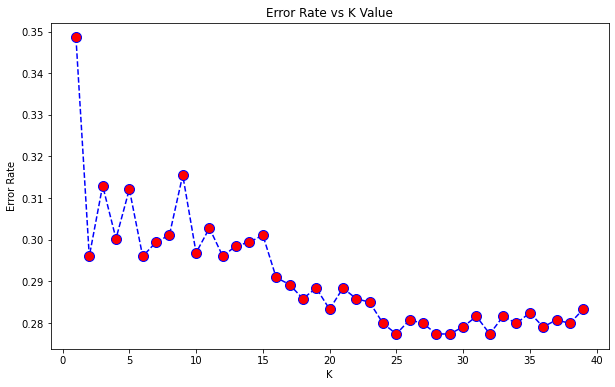

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Run the Final Model
* Even though the minimum error is 24, using a k that high will introduce bias, so we choose to use k = 3

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[699 150]
 [219 111]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       849
           1       0.43      0.34      0.38       330

    accuracy                           0.69      1179
   macro avg       0.59      0.58      0.58      1179
weighted avg       0.67      0.69      0.67      1179



***The overall accuracy for this model is 69% and overall precision is 67%, a slight improvement, however the true positive rate (recall) is lower than in the model with k=1, which was 38%. <br> [Confusion Matrices, Towards Data Science](https://towardsdatascience.com/performance-metrics-confusion-matrix-precision-recall-and-f1-score-a8fe076a2262)***

## Perform kNN for Period 2 (ANYCHD)

### Scale Data

In [25]:
scaler = StandardScaler()
scaler.fit(frmgP2TrimmedCHD.drop('ANYCHD',axis=1))
scaledVariables = scaler.transform(frmgP2TrimmedCHD.drop('ANYCHD',axis=1))
frmgP2ScaledCHD = pd.DataFrame(scaledVariables, columns=frmgP2TrimmedCHD.columns[:-1]) # leaves out predictor variable
frmgP2ScaledCHD.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE
0,-0.389058,-1.408993,-1.269856,-0.883170,-0.682564,0.228697,0.879282,0.181846,0.220747
1,-0.155305,0.191885,0.439895,1.132285,1.637841,0.734979,-0.126882,0.227184,-0.179019
2,1.364088,2.059577,2.193485,1.132285,0.864372,-0.387646,1.063787,0.317860,-1.378318
3,-0.505935,-1.231118,-0.612260,1.132285,1.637841,2.055713,-0.584454,-0.452888,1.020280
4,-0.739688,1.792764,1.579729,-0.883170,-0.682564,-0.431670,1.354074,0.181846,3.418878


## Train Test Split

In [26]:
x = frmgP2ScaledCHD
y = frmgP2TrimmedCHD['ANYCHD']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

## kNN Analysis

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[550 189]
 [172  82]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       739
           1       0.30      0.32      0.31       254

    accuracy                           0.64       993
   macro avg       0.53      0.53      0.53       993
weighted avg       0.64      0.64      0.64       993



***This model has 64% accuracy and overall precision, and 32% recall.***

## Choose the Best Model

In [28]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))
    
min(errorRate)

0.25478348439073517

In [29]:
errorRate.index(min(errorRate))

35

Text(0, 0.5, 'Error Rate')

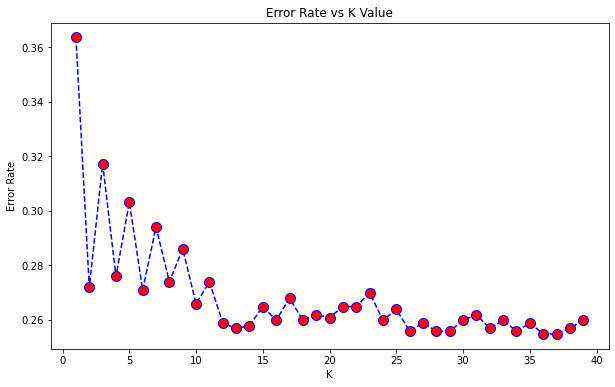

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Run the Final Model
* Even though the minimum error is 35, using a k that high will introduce bias, so we choose to use k = 3

In [31]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[611 128]
 [187  67]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       739
           1       0.34      0.26      0.30       254

    accuracy                           0.68       993
   macro avg       0.55      0.55      0.55       993
weighted avg       0.66      0.68      0.67       993



***The overall accuracy for this model is 68% and overall precision is 66%, however thetrue positive rate (recall) is much lower than in the model with k=1 <br> [Confusion Matrices, Towards Data Science](https://towardsdatascience.com/performance-metrics-confusion-matrix-precision-recall-and-f1-score-a8fe076a2262)***

## Perform kNN for Period 3 (ANYCHD)

### Scale Data

In [32]:
scaler = StandardScaler()
scaler.fit(frmgP3TrimmedCHD.drop('ANYCHD',axis=1))
scaledVariables = scaler.transform(frmgP3TrimmedCHD.drop('ANYCHD',axis=1))
frmgP3ScaledCHD = pd.DataFrame(scaledVariables, columns=frmgP3TrimmedCHD.columns[:-1]) # leaves out predictor variable
frmgP3ScaledCHD.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE
0,-0.268097,-1.395398,-1.330160,-0.730236,-0.589921,-0.016812,0.698759,-0.620642,0.192369
1,-0.629002,1.821608,2.201516,-0.730236,-0.589921,-0.393216,1.383784,-0.277181,0.674897
2,-0.388398,-1.306037,-3.095999,1.369420,1.997623,1.820924,-0.963774,-0.071105,-0.209737
3,0.453714,1.285440,1.671765,-0.730236,-0.589921,0.935268,-0.014488,-0.242835,1.157424
4,-0.629002,1.508844,3.702479,-0.730236,-0.589921,-0.592489,0.855263,-0.139797,-0.209737


## Train Test Split

In [33]:
x = frmgP3ScaledCHD
y = frmgP3TrimmedCHD['ANYCHD']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

## kNN Analysis

In [34]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[378 133]
 [125  56]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.75       511
           1       0.30      0.31      0.30       181

    accuracy                           0.63       692
   macro avg       0.52      0.52      0.52       692
weighted avg       0.63      0.63      0.63       692



***This model has 62% accuracy and 63% overall precision, and a 31% recall.***

## Choose the Best Model

In [35]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))
    
min(errorRate)

0.26011560693641617

In [36]:
errorRate.index(min(errorRate))

20

Text(0, 0.5, 'Error Rate')

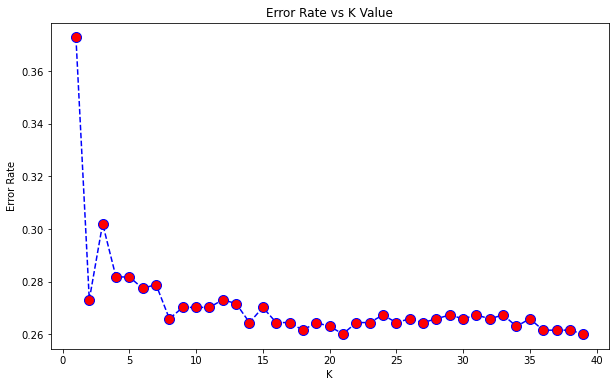

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Run the Final Model
* Even though the minimum error is 20, using a k that high may introduce bias, so we choose to use k = 3

In [38]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[435  76]
 [133  48]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       511
           1       0.39      0.27      0.31       181

    accuracy                           0.70       692
   macro avg       0.58      0.56      0.56       692
weighted avg       0.67      0.70      0.68       692



***The overall accuracy for this model is 70% and overall precision is 67%, however the true positive rate (recall) is lower than in the model with k=1 <br> [Confusion Matrices, Towards Data Science](https://towardsdatascience.com/performance-metrics-confusion-matrix-precision-recall-and-f1-score-a8fe076a2262)***

# Death
---

## Perform kNN for Period 1 (DEATH)

### Scale Data

In [39]:
scaler = StandardScaler()
scaler.fit(frmgP1TrimmedDTH.drop('DEATH',axis=1))
scaledVariables = scaler.transform(frmgP1TrimmedDTH.drop('DEATH',axis=1))
frmgP1ScaledDTH = pd.DataFrame(scaledVariables, columns=frmgP1TrimmedDTH.columns[:-1]) # leaves out predictor variable
frmgP1ScaledDTH.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,HEARTRTE,ANYCHD,STROKE
0,-1.259069,-1.202072,-1.087855,-0.972618,-0.751371,-0.944321,0.273900,0.353756,1.602110,-0.322522
1,-0.452653,-0.532954,-0.176555,-0.972618,-0.751371,0.286232,0.705156,1.598560,-0.624177,-0.322522
2,-0.222249,-0.243003,-0.259401,1.028153,0.923032,0.174363,-0.125502,-0.061178,-0.624177,-0.322522
3,1.275379,0.760673,0.983280,1.028153,1.760234,-0.273111,0.668401,-0.891048,-0.624177,3.100567
4,-0.452653,-0.131483,0.071981,1.028153,1.174193,1.069311,-0.674374,0.768691,-0.624177,-0.322522


## Train Test Split

In [40]:
x = frmgP1ScaledDTH
y = frmgP1TrimmedDTH['DEATH']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

## kNN Analysis

In [41]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[578 178]
 [205 218]]
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       756
           1       0.55      0.52      0.53       423

    accuracy                           0.68      1179
   macro avg       0.64      0.64      0.64      1179
weighted avg       0.67      0.68      0.67      1179



***This model has 68% accuracy and 67% overall precision, but it does have a higher recall than the previous models, at 52%.***

## Choose the Best Model

In [42]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))
    
min(errorRate)

0.24936386768447838

In [43]:
errorRate.index(min(errorRate))

22

Text(0, 0.5, 'Error Rate')

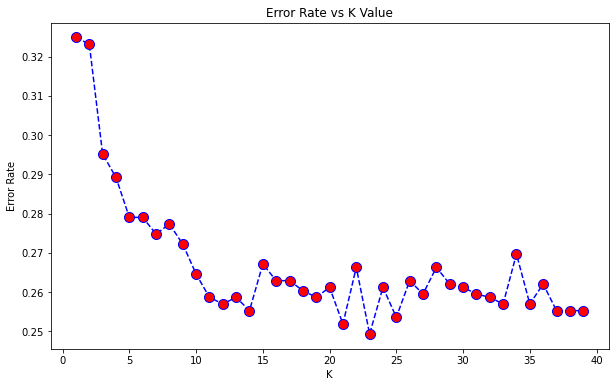

In [44]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Run the Final Model
* Even though the minimum error is 22, using a k that high will introduce bias, so we choose to use k = 11

In [45]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[656 100]
 [205 218]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       756
           1       0.69      0.52      0.59       423

    accuracy                           0.74      1179
   macro avg       0.72      0.69      0.70      1179
weighted avg       0.73      0.74      0.73      1179



***The overall accuracy for this model is 74% and overall precision is 73%, and the true positive rate (recall) is the same as in the model with k=1 <br> [Confusion Matrices, Towards Data Science](https://towardsdatascience.com/performance-metrics-confusion-matrix-precision-recall-and-f1-score-a8fe076a2262)***

## Perform kNN for Period 2 (DEATH)

### Scale Data

In [46]:
scaler = StandardScaler()
scaler.fit(frmgP2TrimmedDTH.drop('DEATH',axis=1))
scaledVariables = scaler.transform(frmgP2TrimmedDTH.drop('DEATH',axis=1))
frmgP2ScaledDTH = pd.DataFrame(scaledVariables, columns=frmgP2TrimmedDTH.columns[:-1]) # leaves out predictor variable
frmgP2ScaledDTH.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,HEARTRTE,ANYCHD,STROKE
0,-0.389058,-1.408993,-1.269856,-0.883170,-0.682564,0.228697,0.879282,0.220747,-0.609828,-0.323222
1,-0.155305,0.191885,0.439895,1.132285,1.637841,0.734979,-0.126882,-0.179019,-0.609828,-0.323222
2,1.364088,2.059577,2.193485,1.132285,0.864372,-0.387646,1.063787,-1.378318,-0.609828,3.093846
3,-0.505935,-1.231118,-0.612260,1.132285,1.637841,2.055713,-0.584454,1.020280,-0.609828,-0.323222
4,-0.739688,1.792764,1.579729,-0.883170,-0.682564,-0.431670,1.354074,3.418878,1.639806,-0.323222


## Train Test Split

In [47]:
x = frmgP2ScaledDTH
y = frmgP2TrimmedDTH['DEATH']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

## kNN Analysis

In [48]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[556 161]
 [146 130]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       717
           1       0.45      0.47      0.46       276

    accuracy                           0.69       993
   macro avg       0.62      0.62      0.62       993
weighted avg       0.70      0.69      0.69       993



***This model has 69% accuracy and 70% overall precision, and a recall of 47%.***

## Choose the Best Model

In [49]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))
    
min(errorRate)

0.22658610271903323

In [50]:
errorRate.index(min(errorRate))

28

Text(0, 0.5, 'Error Rate')

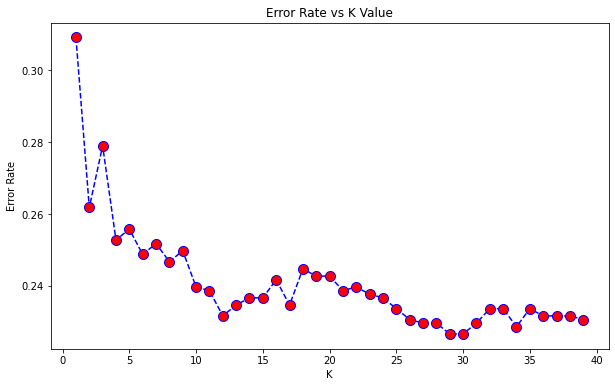

In [51]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Run the Final Model
* Even though the minimum error is 28, using a k that high will introduce bias, so we choose to use k = 3

In [52]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[591 126]
 [151 125]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       717
           1       0.50      0.45      0.47       276

    accuracy                           0.72       993
   macro avg       0.65      0.64      0.64       993
weighted avg       0.71      0.72      0.72       993



***The overall accuracy for this model is 72% and overall precision is 71%, however the true positive rate (recall) is lower than in the model with k=1 <br> [Confusion Matrices, Towards Data Science](https://towardsdatascience.com/performance-metrics-confusion-matrix-precision-recall-and-f1-score-a8fe076a2262)***

## Perform kNN for Period 3 (DEATH)

### Scale Data

In [53]:
scaler = StandardScaler()
scaler.fit(frmgP3TrimmedDTH.drop('DEATH',axis=1))
scaledVariables = scaler.transform(frmgP3TrimmedDTH.drop('DEATH',axis=1))
frmgP3ScaledDTH = pd.DataFrame(scaledVariables, columns=frmgP3TrimmedDTH.columns[:-1]) # leaves out predictor variable
frmgP3ScaledDTH.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,HEARTRTE,ANYCHD,STROKE
0,-0.268097,-1.395398,-1.330160,-0.730236,-0.589921,-0.016812,0.698759,0.192369,-0.587700,-0.301369
1,-0.629002,1.821608,2.201516,-0.730236,-0.589921,-0.393216,1.383784,0.674897,1.701549,-0.301369
2,-0.388398,-1.306037,-3.095999,1.369420,1.997623,1.820924,-0.963774,-0.209737,-0.587700,-0.301369
3,0.453714,1.285440,1.671765,-0.730236,-0.589921,0.935268,-0.014488,1.157424,-0.587700,-0.301369
4,-0.629002,1.508844,3.702479,-0.730236,-0.589921,-0.592489,0.855263,-0.209737,-0.587700,-0.301369


## Train Test Split

In [54]:
x = frmgP3ScaledDTH
y = frmgP3TrimmedDTH['DEATH']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

## kNN Analysis

In [55]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[435 114]
 [ 94  49]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       549
           1       0.30      0.34      0.32       143

    accuracy                           0.70       692
   macro avg       0.56      0.57      0.56       692
weighted avg       0.71      0.70      0.71       692



***This model has 70% accuracy and 71% overall precision, and a recall of 34%.***

## Choose the Best Model

In [56]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))
    
min(errorRate)

0.18208092485549132

In [57]:
errorRate.index(min(errorRate))

18

Text(0, 0.5, 'Error Rate')

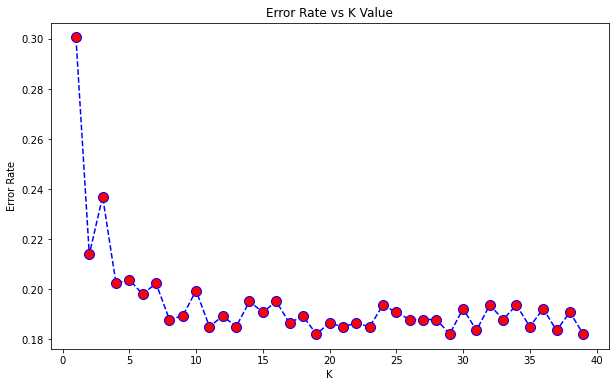

In [58]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Run the Final Model
* Even though the minimum error is 18, using a k that high will introduce bias, so we choose to use k = 11

In [59]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[521  28]
 [100  43]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       549
           1       0.61      0.30      0.40       143

    accuracy                           0.82       692
   macro avg       0.72      0.62      0.65       692
weighted avg       0.79      0.82      0.79       692



***The overall accuracy for this model is 82% and overall precision is 79%, however the true positive rate (recall) is lower than in the model with k=1 <br> [Confusion Matrices, Towards Data Science](https://towardsdatascience.com/performance-metrics-confusion-matrix-precision-recall-and-f1-score-a8fe076a2262)***